In [1]:
import pandas as pd
import arff
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
import pandas as pd

def read_arff(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data_start = lines.index('@DATA\n') + 1

    data_lines = lines[data_start:]

    data = [line.strip().split(',') for line in data_lines]

    header_lines = lines[1:lines.index('@DATA\n')]
    attributes = [line.split()[1].strip('"') for line in header_lines if line.startswith('@ATTRIBUTE')]

    df = pd.DataFrame(data, columns=attributes)
    
    return df

df = read_arff('AI4I2020/dataset.arff')


print(df.head())

  UDI ProductID Type AirTemperature[K] ProcessTemperature[K]  \
0   1    M14860    M             298.1                 308.6   
1   2    L47181    L             298.2                 308.7   
2   3    L47182    L             298.1                 308.5   
3   4    L47183    L             298.2                 308.6   
4   5    L47184    L             298.2                 308.7   

  RotationalSpeed[rpm] Torque[Nm] ToolWear[min] MachineFailure TWF HDF PWF  \
0                 1551       42.8             0              0   0   0   0   
1                 1408       46.3             3              0   0   0   0   
2                 1498       49.4             5              0   0   0   0   
3                 1433       39.5             7              0   0   0   0   
4                 1408       40.0             9              0   0   0   0   

  OSF RNF  
0   0   0  
1   0   0  
2   0   0  
3   0   0  
4   0   0  


In [24]:
df['UDI'] = df['UDI'].apply(str)
df['AirTemperature[K]'] = df['AirTemperature[K]'].apply(float)
df['ProcessTemperature[K]'] = df['ProcessTemperature[K]'].apply(float)
df['RotationalSpeed[rpm]'] = df['RotationalSpeed[rpm]'].apply(float)
df['Torque[Nm]'] = df['Torque[Nm]'].apply(float)
df['ToolWear[min]'] = df['ToolWear[min]'].apply(float)
df['MachineFailure'] = df['MachineFailure'].apply(int)
df['TWF'] = df['TWF'].apply(int)
df['HDF'] = df['HDF'].apply(int)
df['PWF'] = df['PWF'].apply(int)
df['OSF'] = df['OSF'].apply(int)
df['RNF'] = df['RNF'].apply(int)
print(df['Type'].apply(type).unique())

[<class 'str'>]


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UDI                    10000 non-null  object 
 1   ProductID              10000 non-null  object 
 2   Type                   10000 non-null  object 
 3   AirTemperature[K]      10000 non-null  float64
 4   ProcessTemperature[K]  10000 non-null  float64
 5   RotationalSpeed[rpm]   10000 non-null  float64
 6   Torque[Nm]             10000 non-null  float64
 7   ToolWear[min]          10000 non-null  float64
 8   MachineFailure         10000 non-null  int64  
 9   TWF                    10000 non-null  int64  
 10  HDF                    10000 non-null  int64  
 11  PWF                    10000 non-null  int64  
 12  OSF                    10000 non-null  int64  
 13  RNF                    10000 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ M

In [22]:
df.describe()

,AirTemperature[K],ProcessTemperature[K],RotationalSpeed[rpm],Torque[Nm],ToolWear[min],MachineFailure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [23]:
df.Type

0       M
1       L
2       L
3       L
4       L
       ..
9995    M
9996    H
9997    M
9998    H
9999    M
Name: Type, Length: 10000, dtype: object

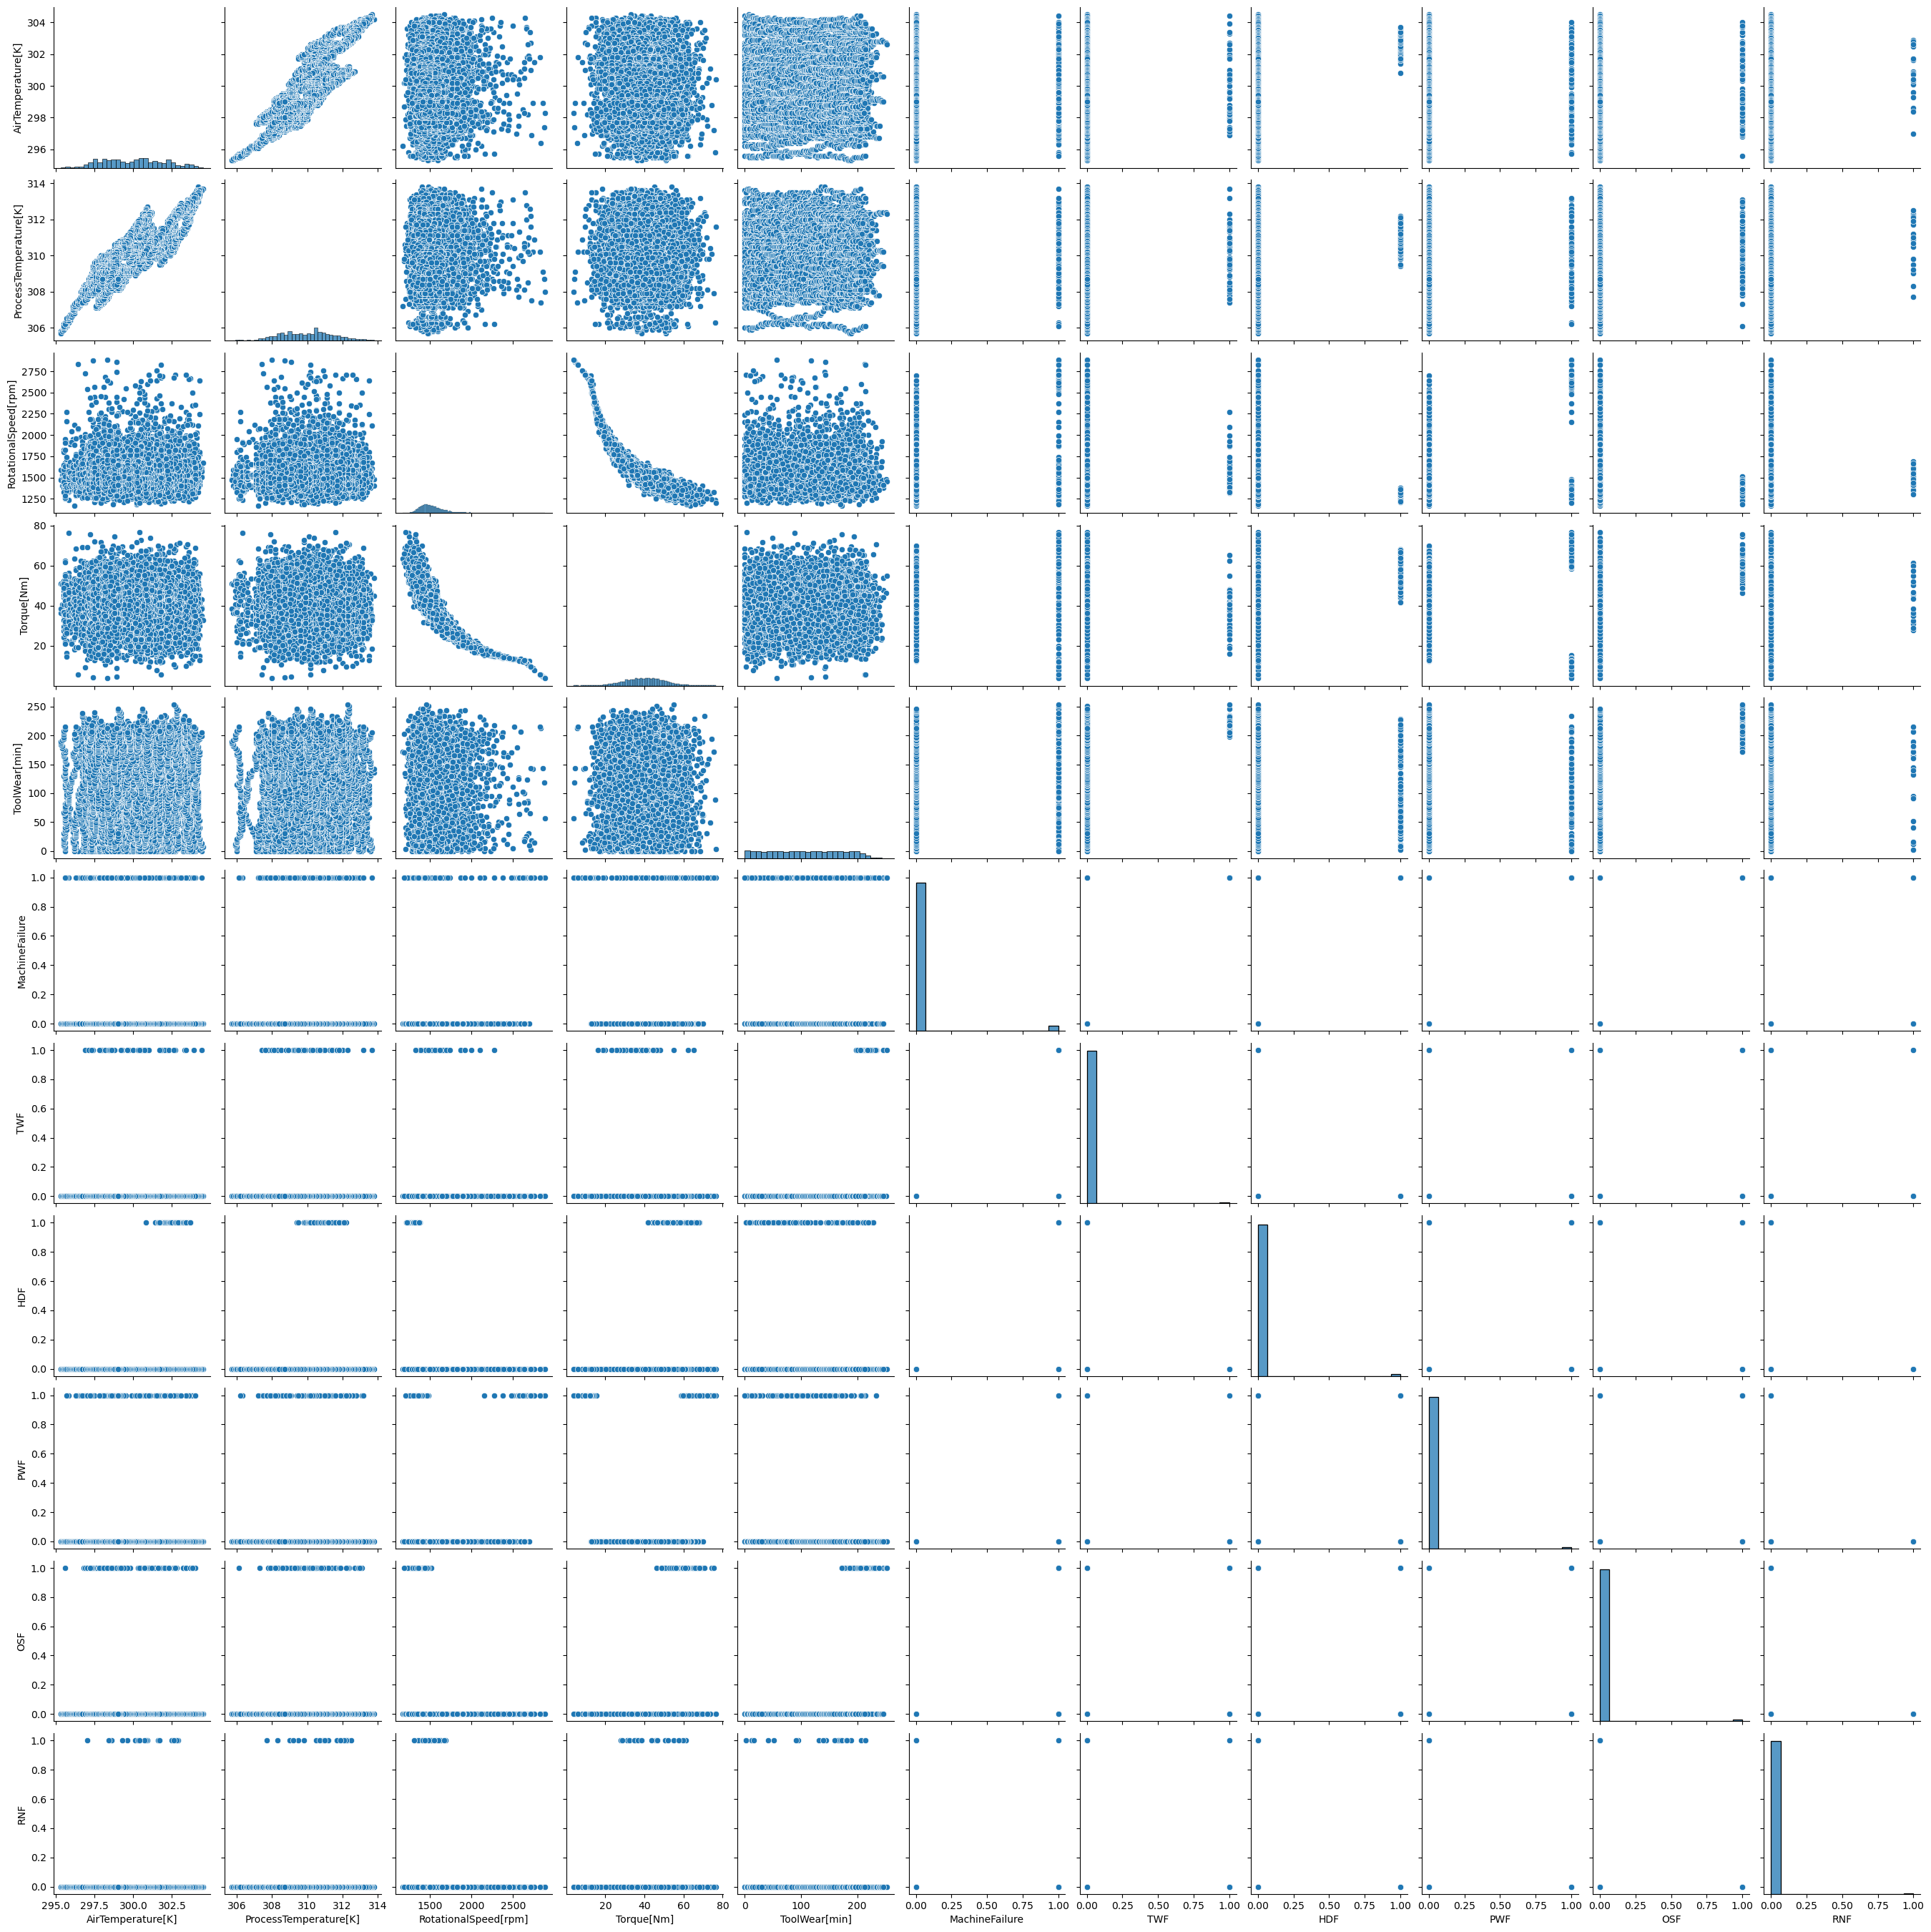

In [25]:
sns.pairplot(df)
plt.show()

In [26]:
df.columns

Index(['UDI', 'ProductID', 'Type', 'AirTemperature[K]',
       'ProcessTemperature[K]', 'RotationalSpeed[rpm]', 'Torque[Nm]',
       'ToolWear[min]', 'MachineFailure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Define features and target variable
X = df[['AirTemperature[K]', 'ProcessTemperature[K]', 'RotationalSpeed[rpm]', 'Torque[Nm]', 'ToolWear[min]']]
y = df['MachineFailure']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform training data, transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression(solver='liblinear')

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9735
Confusion Matrix:
 [[1931    8]
 [  45   16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.67      0.26      0.38        61

    accuracy                           0.97      2000
   macro avg       0.82      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000



Accuracy Score: 0.9735
Confusion Matrix:
 [[1931    8]
 [  45   16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.67      0.26      0.38        61

    accuracy                           0.97      2000
   macro avg       0.82      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000



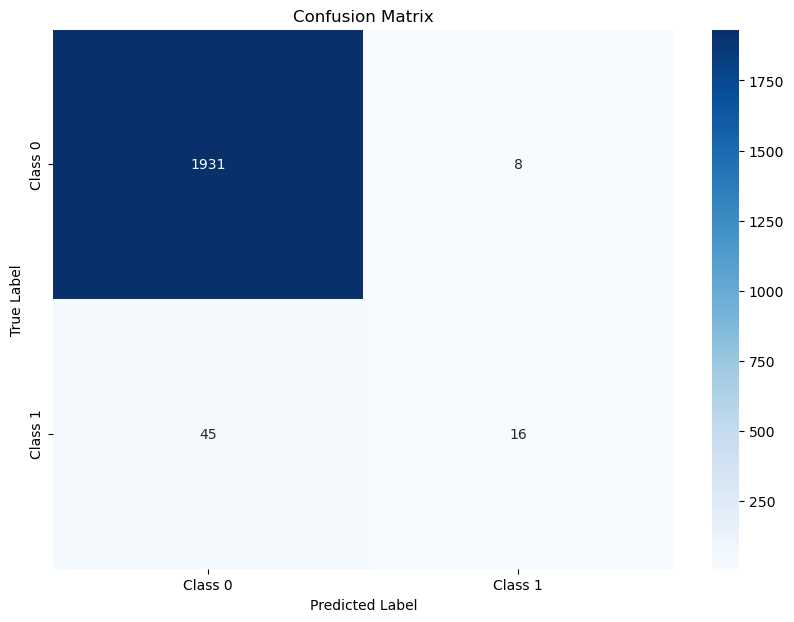

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Define features and target variable
X = df[['AirTemperature[K]', 'ProcessTemperature[K]', 'RotationalSpeed[rpm]', 'Torque[Nm]', 'ToolWear[min]']]
y = df['MachineFailure']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform training data, transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression(solver='liblinear')

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 7))  # Adjust the size of the figure
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'],  # Replace with your actual class labels
            yticklabels=['Class 0', 'Class 1'])  # Replace with your actual class labels

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display the plot
plt.show()